In [3]:
import numpy as np
import pandas as pd
import sys
sys.path.append('/ocean/eolson/MEOPAR/analysis-elise/notebooks/databases/')
import dataProcess as dp
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap #, shiftgrid, cm
from mpl_toolkits.basemap import pyproj
import urllib
from PIL import Image, ImageEnhance
import matplotlib.lines as mlines
import matplotlib
matplotlib.rcParams.update({'legend.numpoints': 1})
%matplotlib inline

In [4]:
df0=pd.read_csv('/ocean/eolson/MEOPAR/obs/FRSampling/stationsDigitized.csv',
                header=0,skiprows=range(1,2))
dp.sizeme(df0[['Station','Date','LatDecDeg','LonDecDeg','LatDecDeg_end','LonDecDeg_end']],60)

,Station,Date,LatDecDeg,LonDecDeg,LatDecDeg_end,LonDecDeg_end
0,1,20170410,49.148333,-123.040000,49.145533,-123.046350
1,2,20170410,49.148333,-123.040000,49.141667,-123.051333
2,3,20170410,49.099983,-123.526600,49.101950,-123.532367
3,4,20170410,49.100383,-123.467017,49.101833,-123.471967
4,5,20170410,49.100583,-123.400417,49.107000,-123.413867
5,6,20170410,49.100500,-123.375500,49.103000,-123.382000
6,7,20170410,49.100000,-123.350000,49.104333,-123.359167
7,8,20170410,49.100333,-123.324667,49.105167,-123.332150
8,9,20170410,49.101500,-123.309000,49.106350,-123.307317


In [5]:
#from arcgisimage:
map1 = Basemap(llcrnrlon=-123.8,llcrnrlat=48.87,urcrnrlon=-122.9,urcrnrlat=49.32, epsg=3857)

server='http://server.arcgisonline.com/ArcGIS'
service='Ocean_Basemap'
xpixels = 500
ypixels = int(map1.aspect*xpixels)
dpi=96
p = pyproj.Proj(init="epsg:%s" % map1.epsg, preserve_units=True)
xmin,ymin = p(map1.llcrnrlon,map1.llcrnrlat)
xmax,ymax = p(map1.urcrnrlon,map1.urcrnrlat)
basemap_url = \
"%s/rest/services/%s/MapServer/export?\
bbox=%s,%s,%s,%s&\
bboxSR=%s&\
imageSR=%s&\
size=%s,%s&\
dpi=%s&\
format=png32&\
f=image" %\
(server,service,xmin,ymin,xmax,ymax,map1.epsg,map1.epsg,xpixels,ypixels,dpi)
print(basemap_url)

http://server.arcgisonline.com/ArcGIS/rest/services/Ocean_Basemap/MapServer/export?bbox=-13781352.960207269,6252831.832272197,-13681165.418493323,6329334.160629635&bboxSR=3857&imageSR=3857&size=500,381&dpi=96&format=png32&f=image


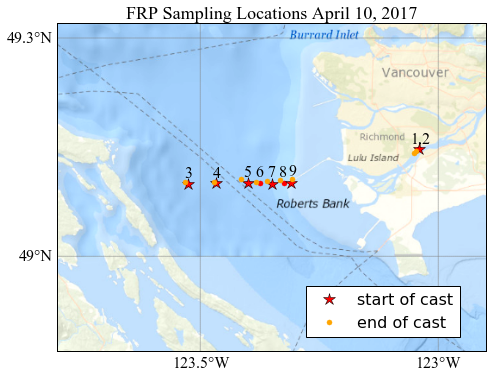

In [6]:
im = Image.open(urllib.request.urlopen(basemap_url))
enhancer0 = ImageEnhance.Color(im)
im0=enhancer0.enhance(1.2)
enhancer1 = ImageEnhance.Brightness(im0)
im2=enhancer1.enhance(1)
enhancer2 = ImageEnhance.Contrast(im2)
im1=enhancer2.enhance(1.4)

fig = plt.figure(figsize=(7,6))
ax = fig.add_axes([0.12,0.01,0.85,0.98])
m = Basemap(llcrnrlon=-123.8,llcrnrlat=48.87, urcrnrlon=-122.9, urcrnrlat=49.32, epsg=3857)
m.imshow(im1, origin="upper")
m.drawparallels((49,49.3),labels=[1,0,0,1],size=16,color='gray',fontname='Times New Roman')
m.drawmeridians((-123.5,-123.0),labels=[1,0,0,1],size=16,color='gray',fontname='Times New Roman')
xpt, ypt = m(df0['LonDecDeg'].values, df0['LatDecDeg'].values)
m.plot([xpt],[ypt],'r.',markersize=10);
xpt, ypt = m(df0.loc[df0.ALS_Turb>0]['LonDecDeg'].values, df0.loc[df0.ALS_Turb>0]['LatDecDeg'].values)
m.plot([xpt],[ypt],'r*',markersize=12);
xpt, ypt = m(df0['LonDecDeg_end'].values, df0['LatDecDeg_end'].values)
m.plot([xpt],[ypt],'.',color='orange',markersize=10);#,color='pink'
x,y = m(-123.060, 49.157)
plt.text(x,y,'1,2',size=16,fontname='Times New Roman')
x,y = m(-123.534, 49.109)
plt.text(x,y,'3',size=16,fontname='Times New Roman')
x,y = m(-123.473, 49.109)
plt.text(x,y,'4',size=16,fontname='Times New Roman')
x,y = m(-123.410, 49.110)
plt.text(x,y,'5',size=16,fontname='Times New Roman')
x,y = m(-123.384, 49.110)
plt.text(x,y,'6',size=16,fontname='Times New Roman')
x,y = m(-123.358, 49.110)
plt.text(x,y,'7',size=16,fontname='Times New Roman')
x,y = m(-123.334,49.110)
plt.text(x,y,'8',size=16,fontname='Times New Roman')
x,y = m(-123.314, 49.111)
plt.text(x,y,'9',size=16,fontname='Times New Roman')
ax.set_title('FRP Sampling Locations April 10, 2017',size=18,fontname='Times New Roman')
p1 = mlines.Line2D([], [], color='r', marker='*',linewidth=0,markersize=12,label='start of cast')
p2 = mlines.Line2D([], [], color='orange',marker='.',linewidth=0,markersize=10,label='end of cast')

ax.legend(handles=[p1,p2],fontsize=16,
          loc='center', bbox_to_anchor=(0.76,0.12))
fig.savefig('/home/eolson/pyCode/notebooks/figs/sampleLocs201704.eps',dpi=400,transparent=True)